**Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.**

In [284]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [285]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 30, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [286]:
# Добавим единицы:

ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
X.shape

(1000, 31)

In [287]:
# Транспонируем матрицу, чтобы не менять функции.
X_tr = X.T
X_tr.shape

(31, 1000)

In [288]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [289]:
X1_mean = X_tr[1].mean()
X1_std = X_tr[1].std()
X_st = X_tr.copy().astype(np.float64)
X_st[1] = (X_tr[1] - X1_mean) / X1_std
np.mean(X_st[1]), np.std(X_st[1])
X_st[2] = calc_std_feat(X_tr[2])
X_st[3] = calc_std_feat(X_tr[3])


In [290]:
# Функция среднеквадратичной ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [291]:
# Функция градиентного спуска с выводом на график
def eval_model(X, y, iterations, alpha=1e-4):
    i_eval=[]
    err_eval=[]
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 800) == 0:
#             print(i, W, err)
            i_eval.append(i)
            err_eval.append(err)
    plt.axis(ymax=50, xmax=400)
    plt.grid(True) 
    return plt.scatter(i_eval, err_eval, label='eval_model')

In [292]:
# Функция стохастического градиентного спуска

def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    i_sgd = []
    err_sgd = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

        if i % (iterations / 800) == 0:
                i_sgd.append(i)
                err_sgd.append(err)
                # print(err)
    # plt.axis(ymax=50, xmax=400)
    plt.grid(True)      
    plt.suptitle('sgd_model')
    return plt.scatter(i_sgd, err_sgd, label='sgd_model')

#     return W


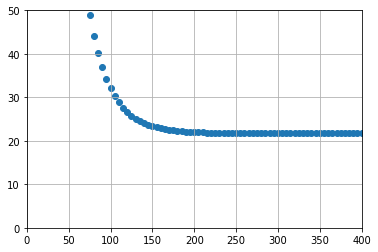

In [293]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

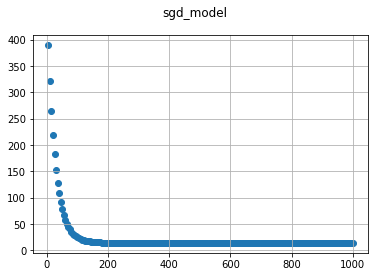

In [294]:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=64, alpha=1e-2)


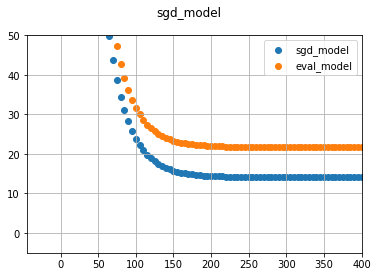

In [295]:
# Или на одном графике:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=64, alpha=1e-2)
eval_model(X_st, y, iterations=1000, alpha=1e-2)
plt.legend()



**Судя по графикам сходимость наступает где-то на 200 итерации, но при стохастическом градиентом спуске среднеквадратичная ошибка находится в районе 15, а при обычном - чуть более 20.**

In [53]:
print('*-'*100)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


**Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.**

In [296]:
# Функция нормализации
def normalization(X):
  X = X.astype(np.float64)
  for i in range (1, X.shape[0]):
    X[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())
  return(X)

normalization(X_st) # Проверка

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93143087, 0.30873341, 0.62986037, ..., 0.23858093, 0.7375656 ,
        0.45899721],
       [0.5736064 , 0.62791585, 0.3939443 , ..., 0.50556544, 0.40118571,
        0.64445231],
       ...,
       [0.40429989, 0.219584  , 0.64695672, ..., 0.79389911, 0.7133081 ,
        0.51888591],
       [0.42937328, 0.40674222, 0.70877586, ..., 0.55085788, 0.54306569,
        0.66398464],
       [0.51984044, 0.7047437 , 0.39547421, ..., 0.49242143, 0.55393496,
        0.50308219]])

In [297]:
# Функция среднеквадратичной ошибки с нормой весов
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [298]:
# Без нормализации
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    i_reg2 = []
    err_reg2 = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 200) == 0:
            i_reg2.append(i)
            err_reg2.append(err)
            plt.grid(True)      
    return plt.scatter(i_reg2, err_reg2, label='without_normalization')


In [280]:
# С нормализацией
def eval_model_reg2_norm(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    i_norm = []
    err_norm = []

    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    X_norm = normalization(X) # Добавим функцию нормализации
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X_norm)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X_norm.T) + lambda_ * W) 
        if i % (iterations / 100) == 0:
            i_norm.append(i)
            err_norm.append(err)
            plt.grid(True)
    return plt.scatter(i_norm, err_norm, label='with_normalization')
    #     print(i, W, err)
    # return err

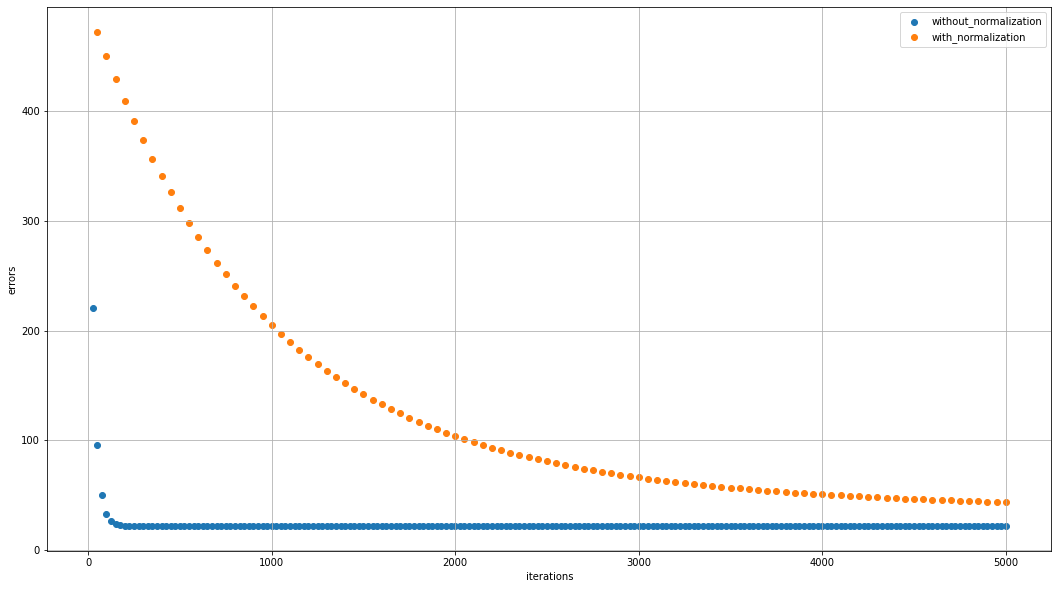

In [299]:
plt.figure(figsize=(18,10))
eval_model_reg2(X_tr, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
eval_model_reg2_norm(X_tr, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
plt.legend()
plt.xlabel('iterations')
plt.ylabel('errors')

plt.show()


**Ответ: у меня получается с нормализацией график плавный, но он выходит на плато через очень большой количество итераций.**